In [80]:
"""数据清洗"""
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# 加载数据
train = pd.read_csv('Resources/train.csv')
test = pd.read_csv('Resources/test.csv')
all_data = pd.concat([train, test], ignore_index=True)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [82]:
# 获取各属性名称
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [83]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
# 数据初步分析
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### （1）Sex属性， 女性存活率高于男性

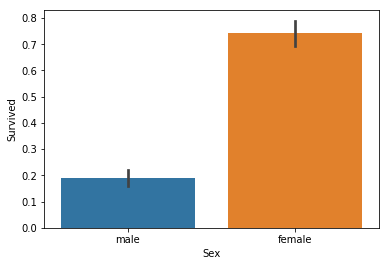

In [85]:
sns.barplot(x='Sex', y='Survived', data=train)

### （2）pclass属性，代表社会等级；社会等级越高，存活几率越高

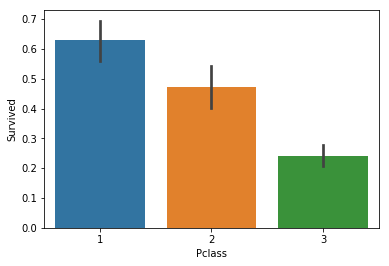

In [86]:
sns.barplot(x='Pclass', y='Survived', data=train)

### (3) SibSp旁系亲友属性；适中存活率较高

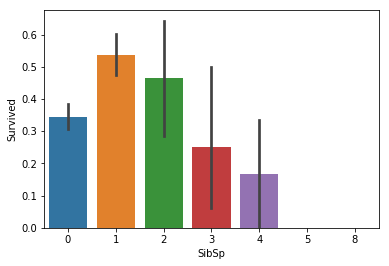

In [87]:
sns.barplot(x='SibSp', y='Survived', data=train)

### (4) Parch属性；直系亲友数量适中存活率较高

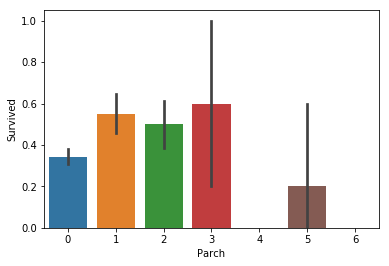

In [88]:
sns.barplot(x='Parch', y='Survived', data=train)

### (5) Age属性；不同年龄生还图像

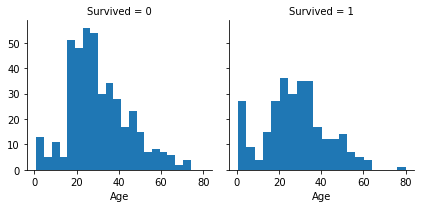

In [89]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### (6) Embarked属性；不同登港港口存活率对比，C港存活率较高

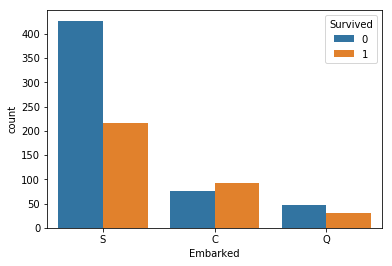

In [90]:
sns.countplot('Embarked', hue='Survived', data=train)

### (7) Title属性(新增)；不同称呼的乘客幸存率不同，考虑从姓名中提取称呼

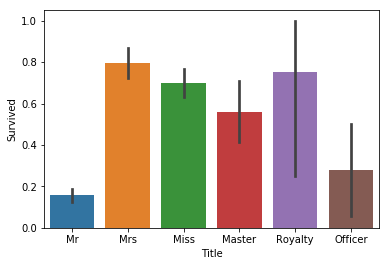

In [91]:
all_data['Title'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
title_dic = dict()
title_dic.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_dic.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_dic.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_dic.update(dict.fromkeys(['Miss', 'Mlle'], 'Miss'))
title_dic.update(dict.fromkeys(['Mr'], 'Mr'))
title_dic.update(dict.fromkeys(['Master', 'Jonkheer'], 'Master'))
all_data['Title'] = all_data['Title'].map(title_dic)
all_data.head()
sns.barplot(x='Title', y='Survived', data=all_data)

### (8) FamilyLable属性（新属性）；家庭成员2-4人存活率较高，先计算familysize=SibSp+Parch

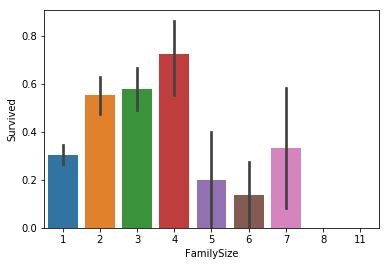

In [92]:
all_data['FamilySize'] = all_data['Parch'] + all_data['SibSp'] + 1
sns.barplot(x='FamilySize', y='Survived', data=all_data)

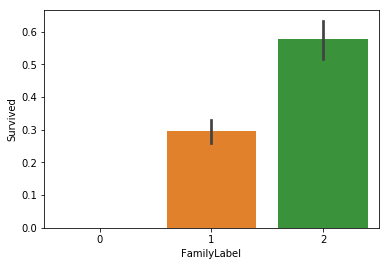

In [93]:
# 按照存活率根据年龄分为3类
def get_family_label(size):
    if size >= 2 and size <= 4:
        return 2
    elif size <=1 or (size > 4 and size <= 7):
        return 1
    return 0
all_data['FamilyLabel'] = all_data['FamilySize'].apply(get_family_label)
sns.barplot(x='FamilyLabel', y='Survived', data=all_data)

### (9)Deck属性(新增属性)；不同甲板乘客存活率不同

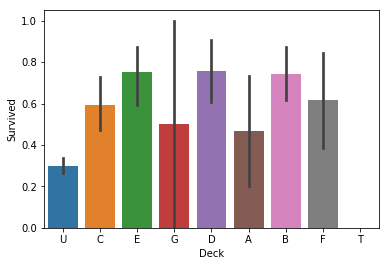

In [94]:
# 将Cabin缺失值填充为Unknow，然后提取首字母构成Deck属性
all_data['Cabin'] = all_data['Cabin'].fillna('Unknow')
all_data['Deck'] = all_data['Cabin'].str.get(0)
sns.barplot(x='Deck', y='Survived', data=all_data)

### (10) TicketGroup属性（新增属性）；与2-4人共票号的乘客存活率较高

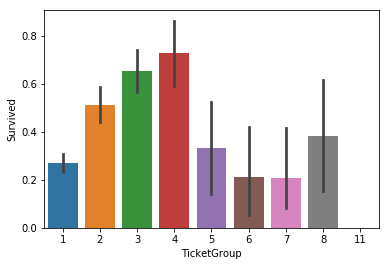

In [95]:
def get_ticket_count(x):
    return dict(all_data['Ticket'].value_counts())[x]
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:get_ticket_count(x))
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

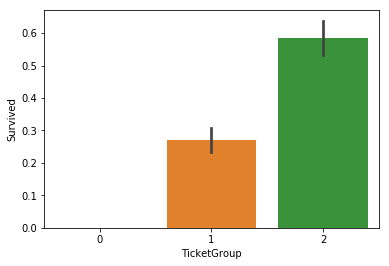

In [96]:
# 按生存率将其分为三类
def get_ticket_label(size):
    if size >= 2 and size <= 4:
        return 2
    elif size <= 1 or (size > 4 and size <= 8):
        return 1
    return 0
all_data['TicketGroup'] = all_data['TicketGroup'].apply(lambda x: get_ticket_label(x))
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

In [97]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
0,22.0,Unknow,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,2,U,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,C,2
2,26.0,Unknow,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,1,U,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,C,2
4,35.0,Unknow,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1,U,1


# 缺失值处理
## 缺失值处理方式主要有以下几种
* 用均值或众数进行填充
* 用统计模型进行预测，例如随机森林、回归模型等
* 删除缺失值
* 保留缺失值

### (1) Embarked缺失值处理
Embarked缺失值为2，观察得失缺失值乘客pclass均为1，且fare均为80，因为Embarked值为C且Pclass为1的乘客的Fare中位数为80，所以缺失值填为80

In [98]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,1,B,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,1,B,2


In [99]:
all_data.groupby(by=['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [100]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

### (2)Fare缺失值处理；用该乘客Embarked=S Pclass=3的中位数填充

In [101]:
all_data[all_data["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
1043,60.5,Unknow,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,1,U,1


In [102]:
fare = all_data[(all_data['Embarked'] == 'S') & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare'] = all_data['Fare'].fillna(fare)

### (3)Age缺失值处理；由于Age缺失值较多， 因此用Sex Title Pclass特征构建随机森林模型填充缺失值

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
age_df = all_data[['Age', 'Sex', 'Title', 'Pclass']]
# one-hot编码
age_df = pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
y = known_age[:, 0]
X = known_age[:, 1:]
random_forest_reg = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
random_forest_reg.fit(X, y)
predict_age = random_forest_reg.predict(unknown_age[:, 1::])
# 将predict_age预测的年龄改为int
predict_age = [int(x) for x in predict_age]
print(predict_age)
all_data.loc[(all_data.Age.isnull()), 'Age'] = predict_age

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


[28, 32, 32, 28, 17, 28, 43, 17, 28, 28, 28, 28, 17, 28, 41, 41, 6, 28, 28, 17, 28, 28, 28, 28, 17, 28, 28, 17, 32, 28, 28, 6, 43, 41, 6, 17, 32, 41, 32, 28, 17, 28, 28, 28, 17, 17, 17, 17, 28, 43, 28, 17, 41, 17, 32, 41, 41, 41, 17, 28, 20, 28, 30, 28, 17, 43, 28, 32, 41, 28, 17, 17, 28, 32, 17, 43, 28, 28, 17, 28, 28, 32, 32, 28, 28, 28, 32, 28, 28, 28, 43, 28, 28, 32, 28, 28, 41, 32, 17, 28, 28, 28, 17, 41, 28, 28, 28, 28, 41, 28, 32, 28, 32, 28, 41, 28, 28, 17, 28, 17, 32, 28, 28, 17, 20, 28, 28, 41, 28, 17, 28, 28, 41, 28, 28, 28, 28, 17, 28, 28, 43, 32, 17, 28, 17, 6, 41, 28, 17, 32, 28, 28, 41, 28, 50, 28, 28, 28, 28, 28, 28, 17, 41, 41, 28, 28, 28, 28, 28, 41, 28, 43, 28, 17, 28, 28, 17, 28, 43, 28, 32, 17, 28, 41, 28, 32, 28, 33, 28, 28, 32, 28, 32, 28, 28, 28, 28, 28, 17, 28, 28, 28, 17, 32, 28, 41, 41, 28, 17, 28, 43, 28, 28, 28, 17, 41, 32, 17, 41, 28, 17, 28, 32, 17, 28, 28, 6, 32, 28, 28, 28, 41, 28, 17, 28, 17, 28, 17, 28, 28, 28, 41, 28, 28, 32, 17, 28, 28, 6, 28, 6, 28

# 将处理后的数据保存到csv中

In [106]:
train_csv_name = "Resources/my_train.csv"
test_csv_name = "Resources/my_test.csv"
all_data = all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data[all_data['Survived'].notnull()].to_csv(train_csv_name, index=False)
all_data[all_data['Survived'].isnull()].to_csv(test_csv_name, index=False)